In [ ]:
import pandas as pd
import plotly
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

df = pd.read_table('/content/gdrive/MyDrive/פרויקט למידת מכונה/AMI_GSE66360_series_matrix.csv', sep=',', header=0)
df

,Class,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48
0,1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1,1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
2,117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
3,121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
4,1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,...,3.525011,3.309030,3.663400,3.324005,4.619261,5.558780,3.416999,3.699181,3.485280,4.211922
54671,AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.506630,2.817982,2.525060,2.917278,2.643849,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
54672,AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.521610,2.840601,2.509774,2.696820,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.487940,2.782356,3.056727,2.833818,3.069542
54673,AFFX-TrpnX-5_at,3.413429,3.399063,3.539970,3.396225,3.434720,3.516090,3.514949,3.475952,3.495199,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.882080,3.649827,3.523410,4.108475


In [ ]:

df=df.loc[:,~df.columns.duplicated()].copy()#Downloads repeating patterns מוריד שורות שחוזרות על עצמן
df.dropna(axis=0, inplace=True)

df= df.set_index(df.loc[:,'Class'])#Put the names of the genes in the first column
df.drop(['Class'],axis=1,inplace=True)

df=df.T  #שחלוף טבלה
df

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
0.1,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
0.2,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
0.3,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
0.4,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.44,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
1.45,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
1.46,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,5.545194,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
1.47,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,9.617118,4.147477,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


In [ ]:
df

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
0.1,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
0.2,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
0.3,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
0.4,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.44,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
1.45,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
1.46,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,5.545194,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
1.47,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,9.617118,4.147477,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


In [ ]:
# Import labels (for the whole dataset, both training and testing)
y = pd.read_csv('/content/gdrive/MyDrive/פרויקט למידת מכונה/type.csv')
print(y.shape)
y.head()

(99, 2)


,patient,type
0,1,H
1,2,H
2,3,H
3,4,H
4,5,H


In [ ]:
#כאן ניתן לראות שיש חלוקה טובה
y['type'].value_counts()

H    50
M    49
Name: type, dtype: int64

In [ ]:
#סידור האינדקסים
df = df.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
# Recode label to numeric
y = y.replace({'H':0,'M':1})
labels = ['H', 'M'] # for plotting convenience later on
y

,patient,type
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
94,95,1
95,96,1
96,97,1
97,98,1


In [ ]:
column_names = list(df.columns.values)#שם ברשימה את כל שמות בגנים שבשורה 0

X=df[column_names] # Features


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)#חלוקה לבדיקה ואימון
#בחלק זה ניסינו כמה אופציות של חלוקת הנתונים ולרנדומליות, לקבלת הביצועים הטובים ביותר

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 89
No. of testing examples: 10


In [ ]:
X_train


Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
53,5.205777,4.723939,6.467701,6.648520,2.669502,6.158476,6.861790,5.900899,6.489723,5.553102,...,5.762759,6.456251,7.424174,6.783842,4.868391,4.099154,4.366157,2.978286,6.523593,3.996634
91,5.996493,5.354105,7.026929,7.413453,3.635945,8.576281,7.529578,7.342618,7.161292,4.717363,...,14.289791,14.170028,14.871884,14.803217,5.144531,3.663400,3.165168,3.143401,4.127459,3.721338
78,5.978695,6.869008,6.249162,6.657831,3.085953,8.081312,6.748485,5.622775,10.779415,4.997263,...,13.944563,13.735691,14.850015,14.762717,4.912735,3.309365,3.380264,2.856190,3.829249,3.926409
13,5.511752,7.856591,7.006409,6.038037,2.803505,8.664974,6.307723,5.159396,8.545849,6.041891,...,13.332333,13.289202,14.553420,14.267240,4.911067,3.537899,3.046305,2.687925,3.544930,3.902700
7,5.235271,7.760259,6.483590,6.345888,2.635150,10.111889,8.214922,5.617263,10.980581,7.961932,...,13.428778,13.425372,14.579482,14.325664,4.318541,3.304716,2.917278,2.509774,3.475952,3.626839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
67,5.003858,7.409556,6.934743,6.679376,2.755722,8.171198,6.624081,5.296347,10.410224,5.174343,...,13.893026,13.733088,14.851408,14.773271,4.710007,3.116542,2.621334,2.707965,3.535207,3.916900
64,5.669553,8.219957,7.191427,7.337136,2.780998,7.920403,5.617247,5.742987,8.158588,4.209336,...,14.233688,14.177550,14.845194,14.778166,4.818071,3.363408,2.871947,2.816448,3.571223,3.569877
47,5.259251,7.524610,8.159858,6.277721,2.715145,9.100500,6.757718,5.230169,10.837172,6.872574,...,13.748319,13.610284,14.803715,14.708141,4.553024,3.029022,2.666742,2.600132,3.687973,3.414251


In [ ]:
X_test

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
26,6.555455,7.481720,8.618611,6.354805,2.589598,9.194887,6.544990,5.570253,10.229507,5.261496,...,13.344793,13.172690,14.816697,14.707567,5.056564,3.459367,2.949552,3.013745,3.711232,3.711046
86,5.432320,7.448598,6.803709,7.089705,3.160426,7.794489,6.603401,6.050114,9.035304,4.239528,...,13.719624,13.594342,14.798603,14.751270,5.509614,3.443226,3.490352,2.984908,3.895199,4.087380
2,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
55,6.018480,7.393510,6.090794,6.055563,2.677309,8.669735,6.524286,5.409625,10.965561,6.349285,...,13.612993,13.464504,14.830611,14.709423,4.633224,3.753193,2.833701,3.003320,3.470963,3.700097
75,5.831683,7.149727,7.024474,6.920165,3.146525,7.510477,5.807569,6.504672,7.630890,5.185181,...,6.867199,8.991852,8.901226,8.447850,4.820079,5.946860,6.353925,3.651794,4.451387,4.749578
92,5.343133,8.271500,6.003973,6.809103,2.710944,8.762452,6.325741,5.501750,9.469315,4.122590,...,13.959234,13.773684,14.891368,14.794340,4.499751,3.324005,2.899104,2.768755,3.668327,3.517545
16,5.237784,7.710327,7.196084,6.412887,2.608746,9.052191,6.657443,5.307557,10.190275,4.170727,...,13.252782,13.362634,14.593383,14.292482,4.467820,3.487610,2.675687,2.623536,3.428026,3.495212
73,5.420405,8.051429,6.683246,7.301405,3.194751,7.741368,7.144733,5.864756,6.502185,3.964719,...,14.328704,14.304753,14.839928,14.777277,4.684996,3.222628,2.850829,2.494189,3.680247,3.389104
54,5.025702,7.568931,5.877905,6.772311,2.855276,8.204286,6.124038,5.158545,10.342055,4.096832,...,14.186865,14.115996,14.859112,14.815835,4.592695,2.833643,2.547798,2.388043,3.479904,3.294335
94,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811


In [ ]:
y_train

,patient,type
53,54,0
91,92,1
78,79,0
13,14,1
7,8,0
...,...,...
95,96,1
67,68,1
64,65,1
47,48,0


In [ ]:
y_test

,patient,type
26,27,1
86,87,1
2,3,0
55,56,0
75,76,0
92,93,1
16,17,1
73,74,0
54,55,0
94,95,1


In [ ]:
def printResult(y_test, y_pred):
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("f1:", metrics.f1_score(y_test, y_pred))
    print("Roc:", metrics.roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca1=pca.fit_transform(X_train)
print(type(X_train_pca1))

<class 'numpy.ndarray'>


51 features explain around 90% of the variance. From 54628 features to 51, not too bad.


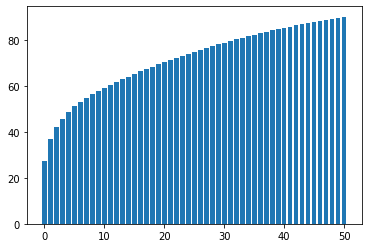

In [ ]:
total = sum(pca.explained_variance_)
#print(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    #print(pca.explained_variance_[k])
    k = k + 1

print(k, " features explain around 90% of the variance. From 54628 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [ ]:
#y_train=y_train.reset_index(drop=True)
#print(y_train)

#y_train=y_train.astype(int)
#print(y_train)

#print( y_train.iloc[:,0])

In [ ]:
'''
pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
#print(X_train_reduced[:, 0])
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
print(fig)
'''

Figure(432x288)


<ipython-input-199-1a51730cf78f>:11: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-199-1a51730cf78f>:13: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-199-1a51730cf78f>:15: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 432x288 with 0 Axes>

In [ ]:
# Apply the same scaling to both datasets
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test) # note that we transform rather than fit_transform

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means accuracy: 0.6


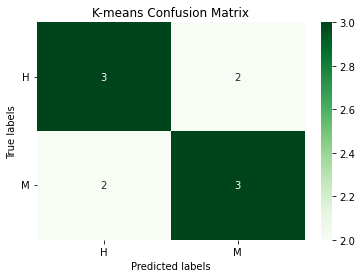

In [ ]:
# ננסה גישת אשכולות ללא פיקוח תוך שימוש בנתונים המותאמים
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_scl)
km_pred = kmeans.predict(X_test_scl)

print('K-means accuracy:', round(accuracy_score(y_test.iloc[:,1], km_pred), 3))

cm_km = confusion_matrix(y_test.iloc[:,1], km_pred)

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('K-means Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

Naive Bayes accuracy: 0.5


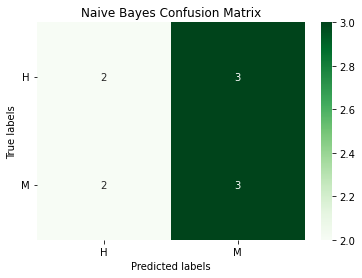

In [ ]:
 #Create a Gaussian classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.iloc[:,1])

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(accuracy_score(y_test.iloc[:,1], nb_pred), 3))

cm_nb =  confusion_matrix(y_test.iloc[:,1], nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Naive Bayes Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

Best Parameters:
 {'C': 0.1, 'penalty': 'l1'}
Logistic Regression accuracy: 0.84


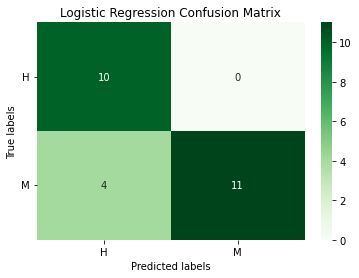

In [ ]:
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10],
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear')

log_model = GridSearchCV(estimator=log_estimator,
                  param_grid=log_grid,
                  cv=3,
                  scoring='accuracy')

log_model.fit(X_train, y_train.iloc[:,1])

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test.iloc[:,1], log_pred), 3))

cm_log =  confusion_matrix(y_test.iloc[:,1], log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

Best Parameters:
 {'C': 100, 'decision_function_shape': 'ovo', 'gamma': 1e-05, 'kernel': 'rbf'}
SVM accuracy: 0.72


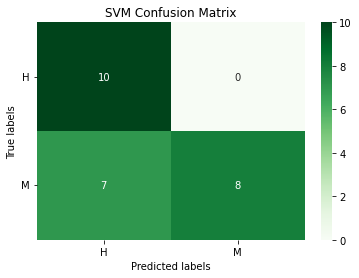

In [ ]:
# Parameter grid
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]}

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

# Train the classifier
svm_grid.fit(X_train_pca, y_train.iloc[:,1])

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

# Make predictions using the optimised parameters
svm_pred = best_svc.predict(X_test_pca)

print('SVM accuracy:', round(accuracy_score(y_test.iloc[:,1], svm_pred), 3))

cm_svm =  confusion_matrix(y_test.iloc[:,1], svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Greens')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

In [ ]:
#Logistic Regression
def logist(X_train, X_test, y_train):
    # instantiate the model
    logreg = LogisticRegression(solver='liblinear')
    # fit the model with data
    logreg.fit(X_train, y_train)
    # predicting
    y_pred= logreg.predict(X_test)
    return y_pred

In [ ]:
#Decision Tree
def j48(X_train, X_test, y_train):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    return y_pred

In [ ]:
#naivBase
def naivBase(X_train, X_test, y_train):
    # Create a Gaussian Classifier
    gnb = GaussianNB()

    # Train the model using the training sets
    gnb.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    return y_pred

In [ ]:
#svm
def svm(X_train, X_test, y_train):
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    return y_pred

In [ ]:
#פונקציית עזר לציור הגרפים
def graf(data, nameY):
    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(courses, values, color='maroon',
            width=0.4)

    plt.xlabel("classify")
    plt.ylabel(nameY)
    plt.title("result classify of kind "+ nameY)
    plt.show()

In [ ]:
y_train_list=y_train.type
y_test_list=y_test.type

In [ ]:
#שליחות לפונקציות המודלים
y_pred_log = logist(X_train, X_test, y_train_list)
y_pred_j48 = j48(X_train, X_test, y_train_list)
y_pred_naivBase = naivBase(X_train, X_test, y_train_list)
y_pred_svm = svm(X_train, X_test, y_train_list)

In [ ]:
#שליחות לפונקציות המודלים
#_pca
y_pred_log_pca = logist(X_train_pca, X_test_pca, y_train_list)
y_pred_j48_pca = j48(X_train_pca, X_test_pca, y_train_list)
y_pred_naivBase_pca = naivBase(X_train_pca, X_test_pca, y_train_list)
y_pred_svm_pca= svm(X_train_pca, X_test_pca, y_train_list)

In [ ]:
#  float עבור מודלים אלו נדרש דטה מסוג

y_pred_j48_f = y_pred_j48.astype(float)
y_test_list_f=y_test_list.astype(float)

In [ ]:
#  float עבור מודלים אלו נדרש דטה מסוג
#_pca
y_pred_j48_f_pca = y_pred_j48_pca.astype(float)
y_test_list_f=y_test_list.astype(float)


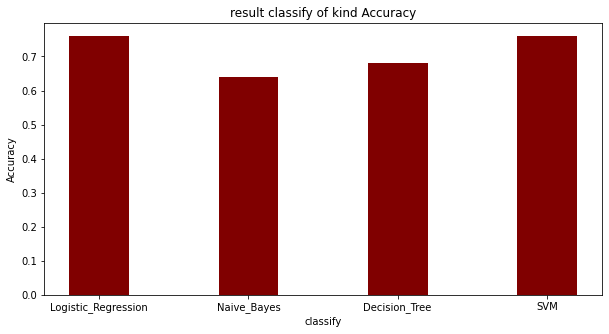

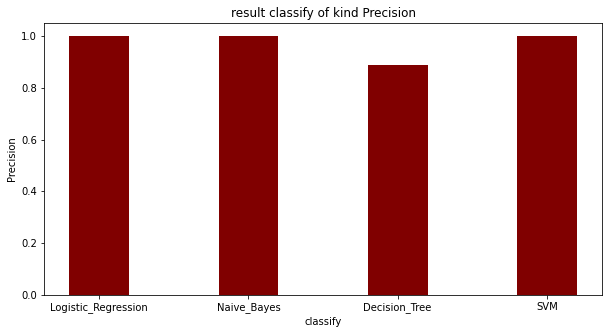

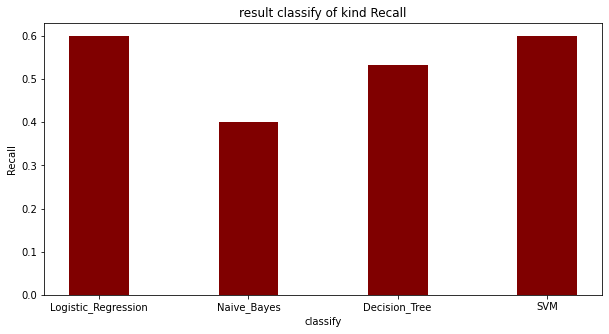

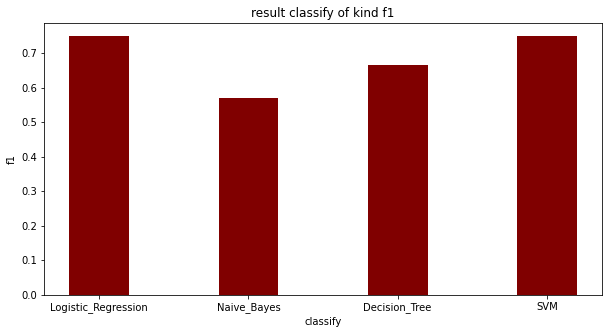

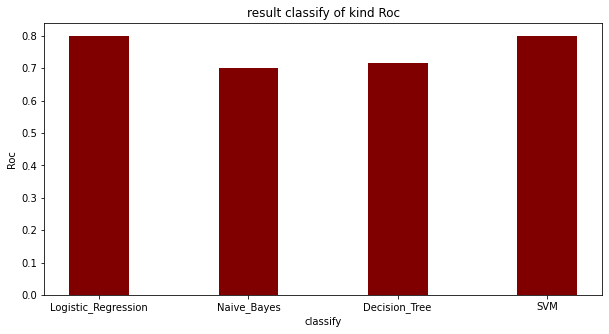

{'Logistic_Regression': 0.76, 'Naive_Bayes': 0.64, 'Decision_Tree': 0.68, 'SVM': 0.76}
{'Logistic_Regression': 1.0, 'Naive_Bayes': 1.0, 'Decision_Tree': 0.8888888888888888, 'SVM': 1.0}
{'Logistic_Regression': 0.6, 'Naive_Bayes': 0.4, 'Decision_Tree': 0.5333333333333333, 'SVM': 0.6}
{'Logistic_Regression': 0.7499999999999999, 'Naive_Bayes': 0.5714285714285715, 'Decision_Tree': 0.6666666666666667, 'SVM': 0.7499999999999999}
{'Logistic_Regression': 0.8, 'Naive_Bayes': 0.7, 'Decision_Tree': 0.7166666666666666, 'SVM': 0.8}


In [ ]:
# creating the dataset
#יוצרים את הדטה המתאים עבור כל מודל ומצריירים בגרף עבור כל מדידה
#_pca
data_Accuracy = {'Logistic_Regression': metrics.accuracy_score(y_test_list, y_pred_log_pca),
        'Naive_Bayes': metrics.accuracy_score(y_test_list, y_pred_naivBase_pca),
        'Decision_Tree': metrics.accuracy_score(y_test_list, y_pred_j48_pca),
        'SVM': metrics.accuracy_score(y_test_list, y_pred_svm_pca)}

data_precision = {'Logistic_Regression': metrics.precision_score(y_test_list, y_pred_log_pca),
        'Naive_Bayes': metrics.precision_score(y_test_list, y_pred_naivBase_pca),
        'Decision_Tree': metrics.precision_score(y_test_list, y_pred_j48_pca),
        'SVM': metrics.precision_score(y_test_list, y_pred_svm_pca)}

data_recall = {'Logistic_Regression': metrics.recall_score(y_test_list, y_pred_log_pca),
       'Naive_Bayes': metrics.recall_score(y_test_list, y_pred_naivBase_pca),
       'Decision_Tree': metrics.recall_score(y_test_list_f, y_pred_j48_f_pca),
       'SVM': metrics.recall_score(y_test_list, y_pred_svm_pca)}

data_f1 = {'Logistic_Regression': metrics.f1_score(y_test_list, y_pred_log_pca),
                     'Naive_Bayes': metrics.f1_score(y_test_list, y_pred_naivBase_pca),
                     'Decision_Tree': metrics.f1_score(y_test_list, y_pred_j48_pca),
                     'SVM': metrics.f1_score(y_test_list, y_pred_svm_pca)}

data_roc = {'Logistic_Regression': metrics.roc_auc_score(y_test_list, y_pred_log_pca),
                     'Naive_Bayes': metrics.roc_auc_score(y_test_list, y_pred_naivBase_pca),
                     'Decision_Tree': metrics.roc_auc_score(y_test_list, y_pred_j48_pca),
                     'SVM': metrics.roc_auc_score(y_test_list, y_pred_svm_pca)}

graf(data_Accuracy, "Accuracy")
graf(data_precision, "Precision")
graf(data_recall, "Recall")
graf(data_f1, "f1")
graf(data_roc, "Roc")

print(data_Accuracy)
print(data_precision)
print(data_recall)
print(data_f1)
print(data_roc)


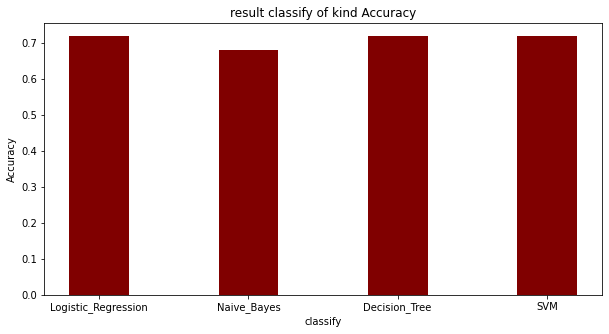

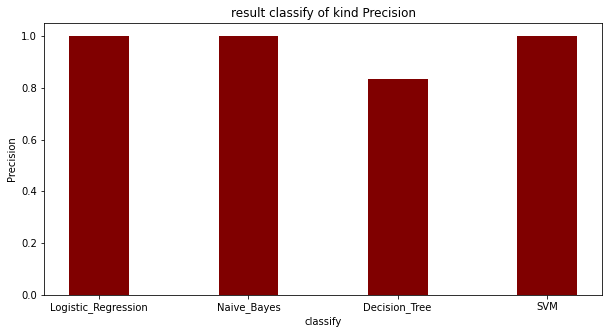

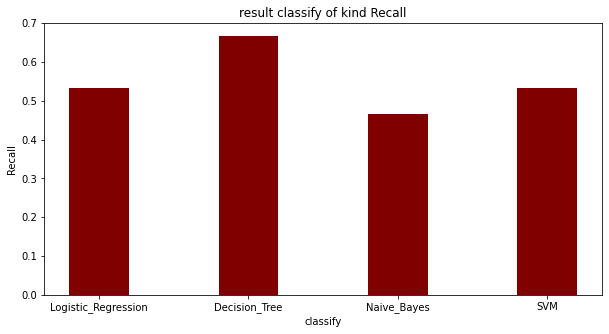

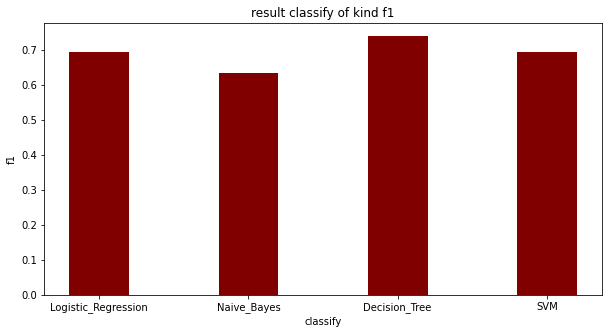

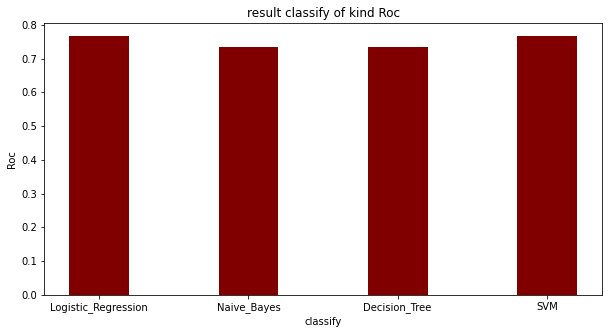

In [ ]:
# creating the dataset
data_Accuracy = {'Logistic_Regression': metrics.accuracy_score(y_test_list, y_pred_log),
        'Naive_Bayes': metrics.accuracy_score(y_test_list, y_pred_naivBase),
        'Decision_Tree': metrics.accuracy_score(y_test_list, y_pred_j48),
        'SVM': metrics.accuracy_score(y_test_list, y_pred_svm)}

data_precision = {'Logistic_Regression': metrics.precision_score(y_test_list, y_pred_log),
        'Naive_Bayes': metrics.precision_score(y_test_list, y_pred_naivBase),
        'Decision_Tree': metrics.precision_score(y_test_list, y_pred_j48),
        'SVM': metrics.precision_score(y_test_list, y_pred_svm)}

data_recall = {'Logistic_Regression': metrics.recall_score(y_test_list, y_pred_log),
       'Decision_Tree': metrics.recall_score(y_test_list_f, y_pred_j48_f),
       'Naive_Bayes': metrics.recall_score(y_test_list, y_pred_naivBase),
       'SVM': metrics.recall_score(y_test_list, y_pred_svm)}

data_f1 = {'Logistic_Regression': metrics.f1_score(y_test_list, y_pred_log),
                     'Naive_Bayes': metrics.f1_score(y_test_list, y_pred_naivBase),
                     'Decision_Tree': metrics.f1_score(y_test_list, y_pred_j48),
                     'SVM': metrics.f1_score(y_test_list, y_pred_svm)}

data_roc = {'Logistic_Regression': metrics.roc_auc_score(y_test_list, y_pred_log),
                     'Naive_Bayes': metrics.roc_auc_score(y_test_list, y_pred_naivBase),
                     'Decision_Tree': metrics.roc_auc_score(y_test_list, y_pred_j48),
                     'SVM': metrics.roc_auc_score(y_test_list, y_pred_svm)}



graf(data_Accuracy, "Accuracy")
graf(data_precision, "Precision")
graf(data_recall, "Recall")
graf(data_f1, "f1")
graf(data_roc, "Roc")

In [ ]:
print(data_Accuracy)
print(data_precision)
print(data_recall)
print(data_f1)
print(data_roc)

{'Logistic_Regression': 0.72, 'Naive_Bayes': 0.68, 'Decision_Tree': 0.72, 'SVM': 0.72}
{'Logistic_Regression': 1.0, 'Naive_Bayes': 1.0, 'Decision_Tree': 0.8333333333333334, 'SVM': 1.0}
{'Logistic_Regression': 0.5333333333333333, 'Decision_Tree': 0.6666666666666666, 'Naive_Bayes': 0.4666666666666667, 'SVM': 0.5333333333333333}
{'Logistic_Regression': 0.6956521739130436, 'Naive_Bayes': 0.6363636363636364, 'Decision_Tree': 0.7407407407407408, 'SVM': 0.6956521739130436}
{'Logistic_Regression': 0.7666666666666666, 'Naive_Bayes': 0.7333333333333334, 'Decision_Tree': 0.7333333333333333, 'SVM': 0.7666666666666666}
